In [3]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [5]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [6]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [25]:
log = lammps_logfile.File("generate.log")
timestep = 1

time, lx, ly, lz, temp = [], [], [], [], []
for i in [0, 1, 2, 3]:
    time.append(log.get("Step", run_num=i)*timestep/1000) # ps
    lx.append(log.get("Lx", run_num=i))
    ly.append(log.get("Ly", run_num=i))
    lz.append(log.get("Lz", run_num=i))
    temp.append(log.get("Temp", run_num=i))

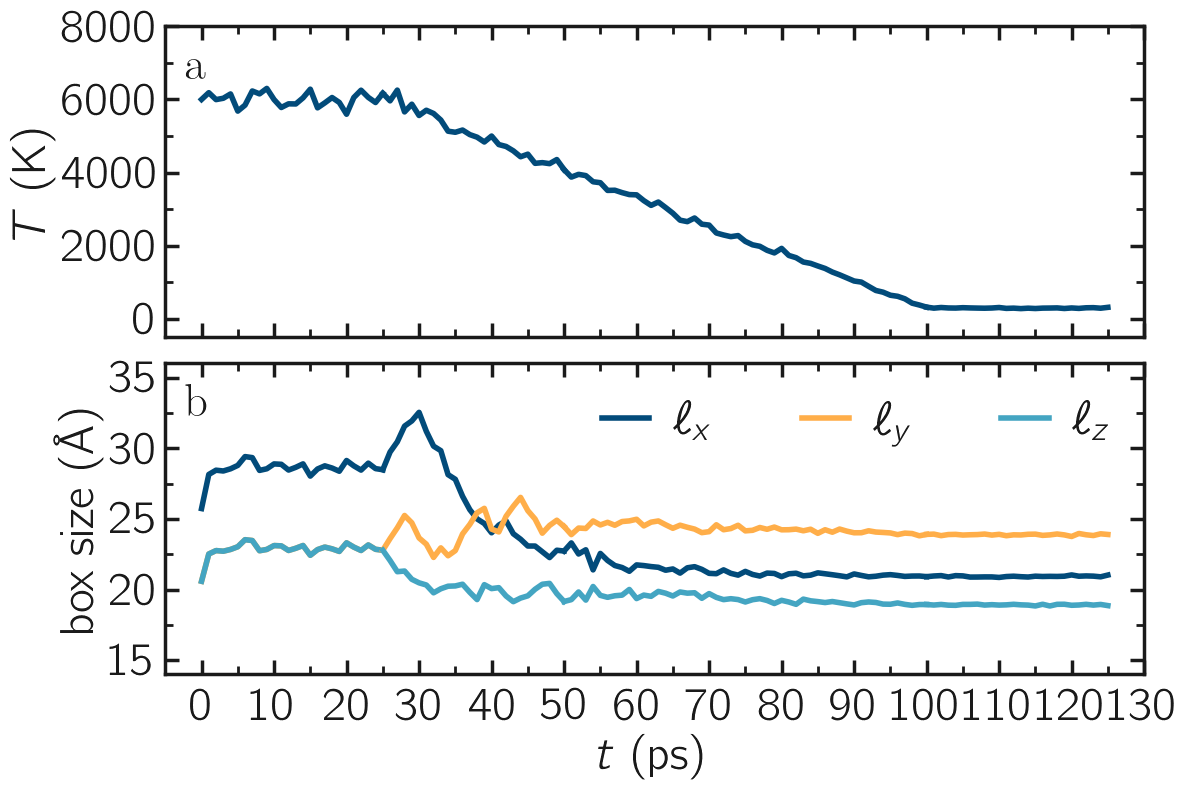

In [55]:
filename = "GCMC-dimension"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
for i in [0, 1, 2, 3]:
    myplt.add_plot(x = time[i], y = temp[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$T ~ (\mathrm{K})$',
                     xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 131, 10), y_ticks=np.arange(0, 8001, 2000),
                    x_boundaries=(-5, 130), y_boundaries=(-500, 6500))
# Panel b
myplt.add_panel()
for i in [0, 1, 2]:
    myplt.add_plot(x = time[i], y = lx[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
    myplt.add_plot(x = time[i], y = ly[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    myplt.add_plot(x = time[i], y = lz[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color3, markersize = 12)
i = 3
myplt.add_plot(x = time[i], y = lx[i], type = "plot", linewidth_data = 3,
            marker = "-", data_color = color2, markersize = 12, data_label = r"$\ell_x$")
myplt.add_plot(x = time[i], y = ly[i], type = "plot", linewidth_data = 3,
            marker = "-", data_color = color1, markersize = 12, data_label = r"$\ell_y$")
myplt.add_plot(x = time[i], y = lz[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color3, markersize = 12, data_label = r"$\ell_z$")
myplt.complete_panel(ylabel = r'box size$~(\mathrm{\AA{}})$',
                     xlabel = r'$t~(\mathrm{ps})$', xpad = 10, legend=True, ncol_legend=3)
myplt.set_boundaries(x_ticks=np.arange(0, 131, 10), y_ticks=np.arange(15, 38, 5),
                    x_boundaries=(-5, 130), y_boundaries=(14, 36))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)